In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv("./churn_dataset.csv")

In [3]:
df['gender'].map({"Male": 1, "Female": 0})

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace(" ", "0.0"))

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(f"Number of unique customers: {len(df['customerID'].unique())}")

Number of unique customers: 7043


### Dataset Card
Number of Rows: 7043
Number of Columns: 21

Number of numeric columns: 3
Number of categorical columns: 17

Number of unique customers: 7043

Columns description:
+ **customerID** (id): Unique customer id
+ **gender** (categorical): Customer gender (**Male**, **Female**)
+ **SeniorCitizen** (categorical): Whether the customer is a senior citizen or not (**1**, **0**)
+ **Partner** (categorical): Whether the customer has a partner or not (Yes, No)
+ **Dependents** (categorical): Whether the customer has dependents or not (Yes, No)
+ **tenure** (numeric): Number of months the customer has stayed with the company
+ **PhoneService** (categorical): Whether the customer has a phone service or not (Yes, No)
+ **MultipleLines** (categorical): Whether the customer has multiple lines or not (Yes, No, No phone service)
+ **InternetService** (categorical): Customer’s internet service provider (DSL, Fiber optic, No)
+ **OnlineSecurity** (categorical): Whether the customer has online security or not (Yes, No, No internet service)
+ **OnlineBackup** (categorical): Whether the customer has online backup or not (Yes, No, No internet service)
+ **DeviceProtection** (categorical): Whether the customer has device protection or not (Yes, No, No internet service)
+ **TechSupport** (categorical): Whether the customer has tech support or not (Yes, No, No internet service)
+ **StreamingTV** (categorical): Whether the customer has streaming TV or not (Yes, No, No internet service)
+ **StreamingMovies** (categorical): Whether the customer has streaming movies or not (Yes, No, No internet service)
+ **Contract** (categorical): The contract term of the customer (Month-to-month, One year, Two year)
+ **PaperlessBilling** (categorical): Whether the customer has paperless billing or not (Yes, No)
+ **PaymentMethod** (categorical): The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
+ **MonthlyCharges** (numeric): The amount charged to the customer monthly
+ **TotalCharges** (numeric): The total amount charged to the customer
+ **Churn** (categorical): Whether the customer churned or not (Yes or No). **(TARGET)**

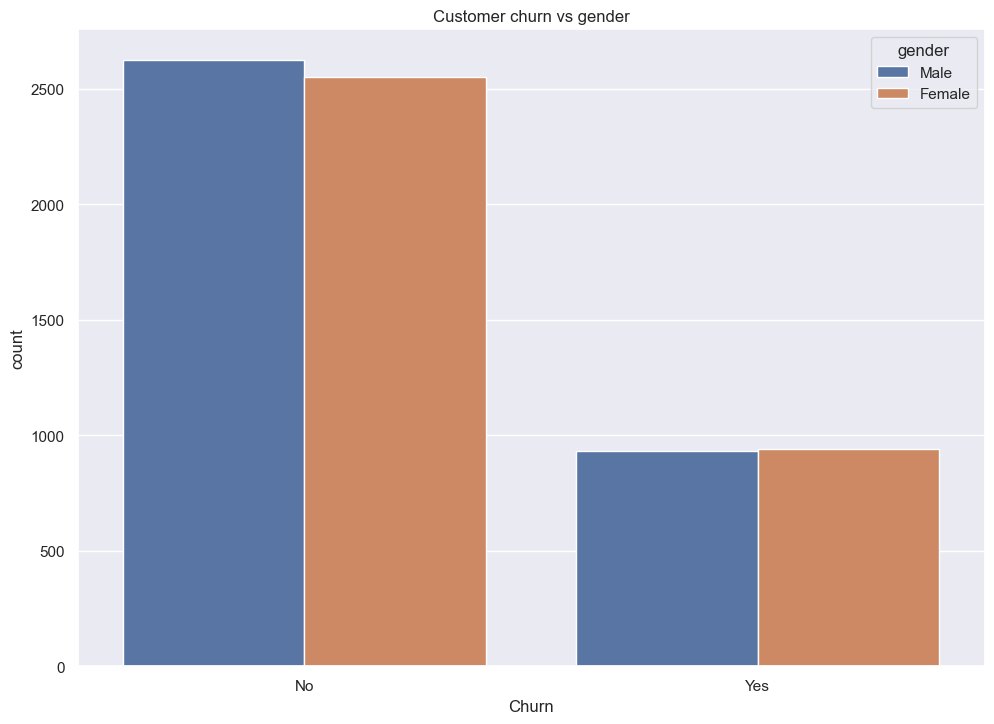

In [8]:
data = df.groupby("Churn")["gender"].value_counts().reset_index()
sns.barplot(data=data, x="Churn", y="count", hue="gender")
plt.title("Customer churn vs gender")
plt.show()

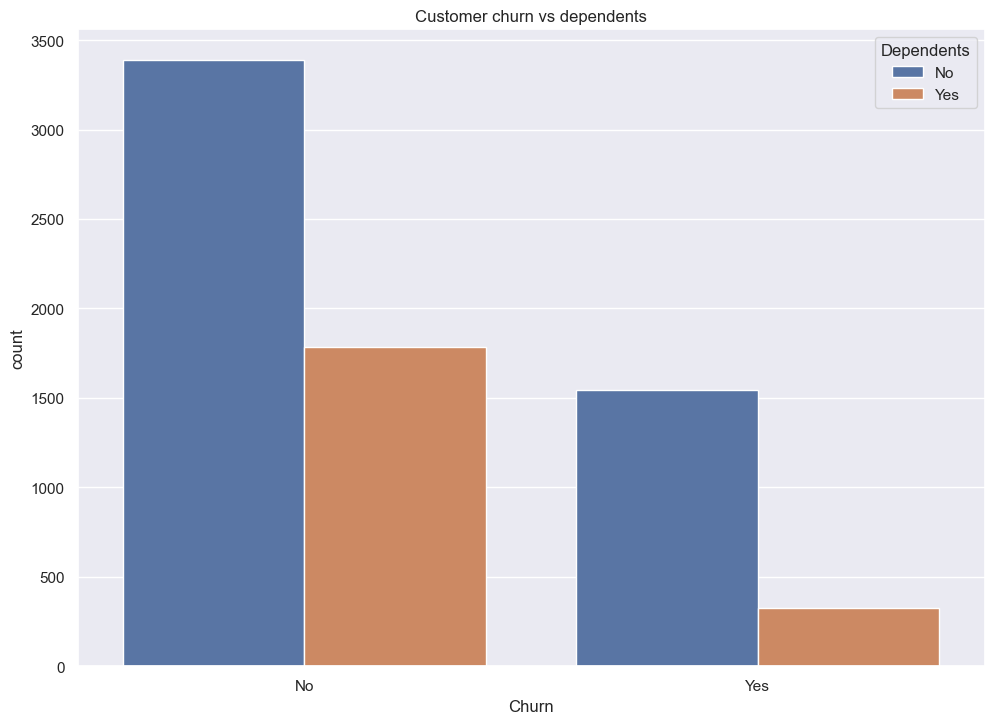

In [9]:
data = df.groupby("Churn")["Dependents"].value_counts().reset_index()
sns.barplot(data=data, x="Churn", y="count", hue="Dependents")
plt.title("Customer churn vs dependents")
plt.show()

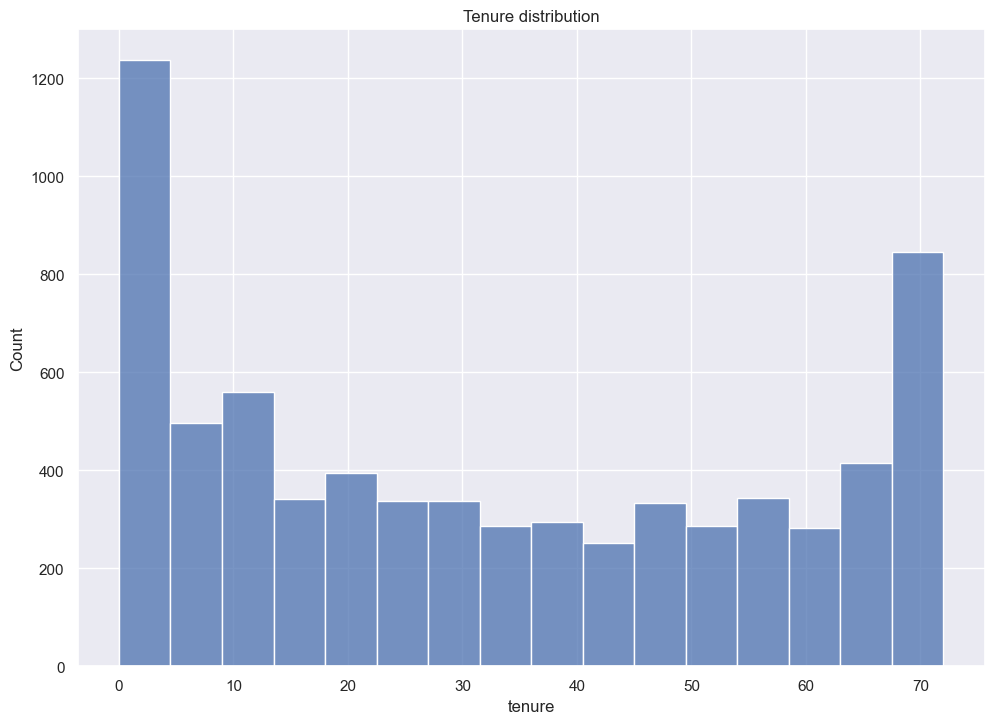

In [10]:
sns.histplot(df["tenure"])
plt.title("Tenure distribution")
plt.show()

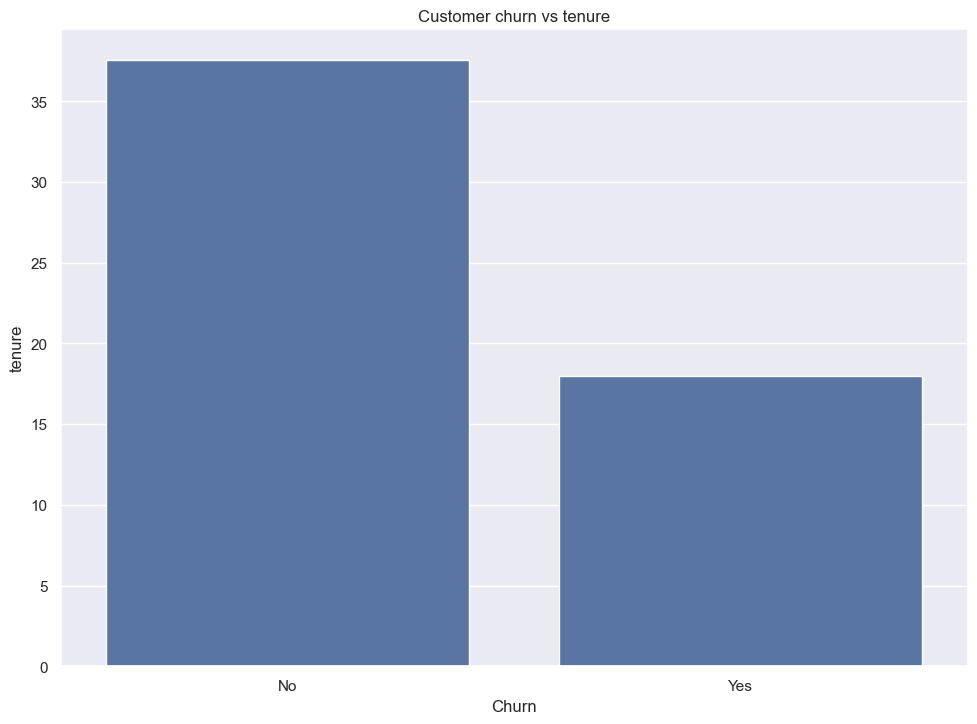

In [11]:
data = df.groupby("Churn")["tenure"].mean().reset_index()
sns.barplot(data=data, x="Churn", y="tenure")
plt.title("Customer churn vs tenure")
plt.show()

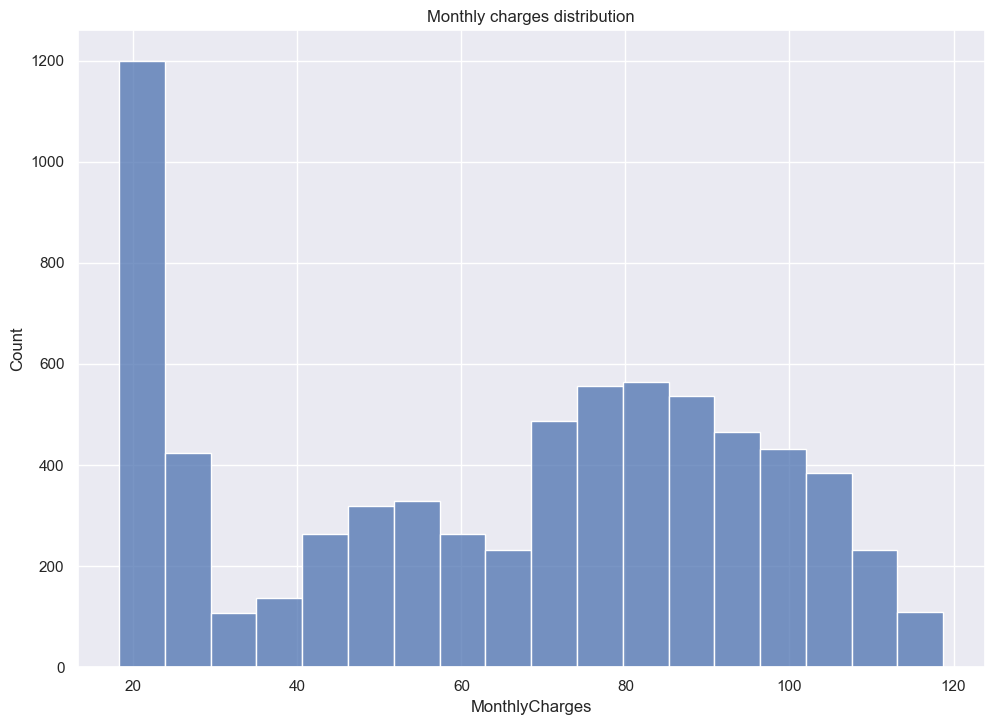

In [12]:
sns.histplot(df["MonthlyCharges"])
plt.title("Monthly charges distribution")
plt.show()

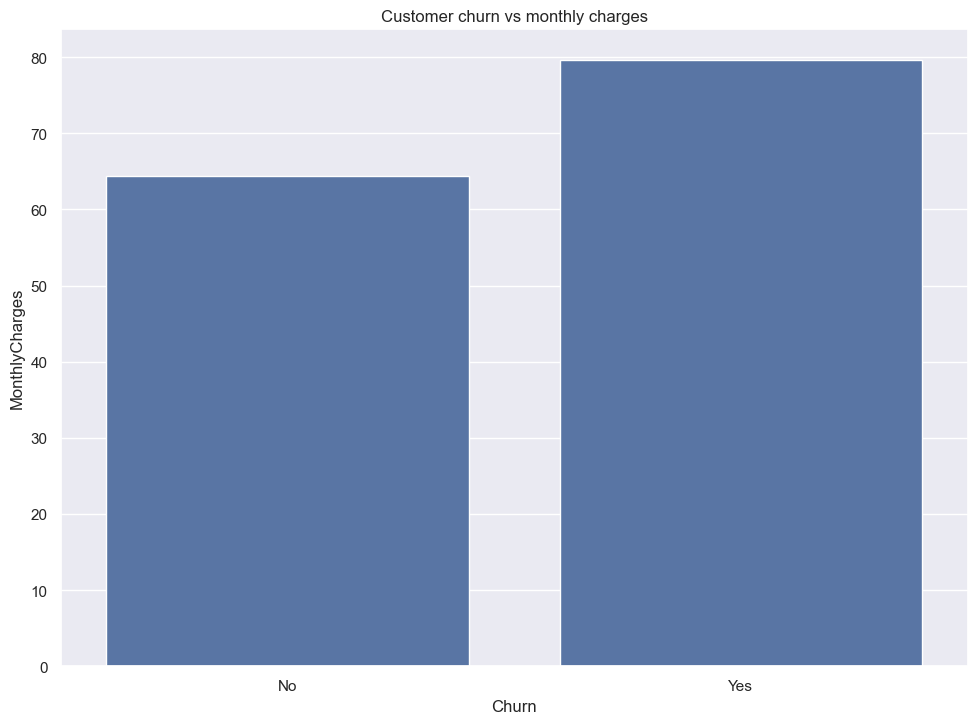

In [13]:
data = df.groupby("Churn")["MonthlyCharges"].median().reset_index()
sns.barplot(data=data, x="Churn", y="MonthlyCharges")
plt.title("Customer churn vs monthly charges")
plt.show()

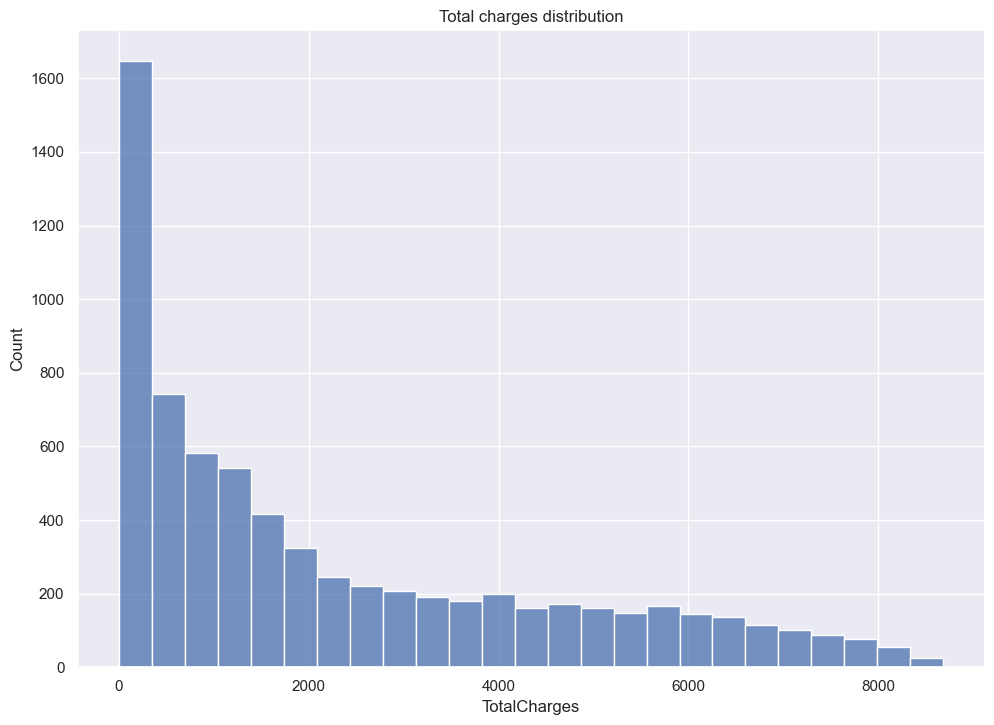

In [14]:
sns.histplot(df["TotalCharges"])
plt.title("Total сharges distribution")
plt.show()

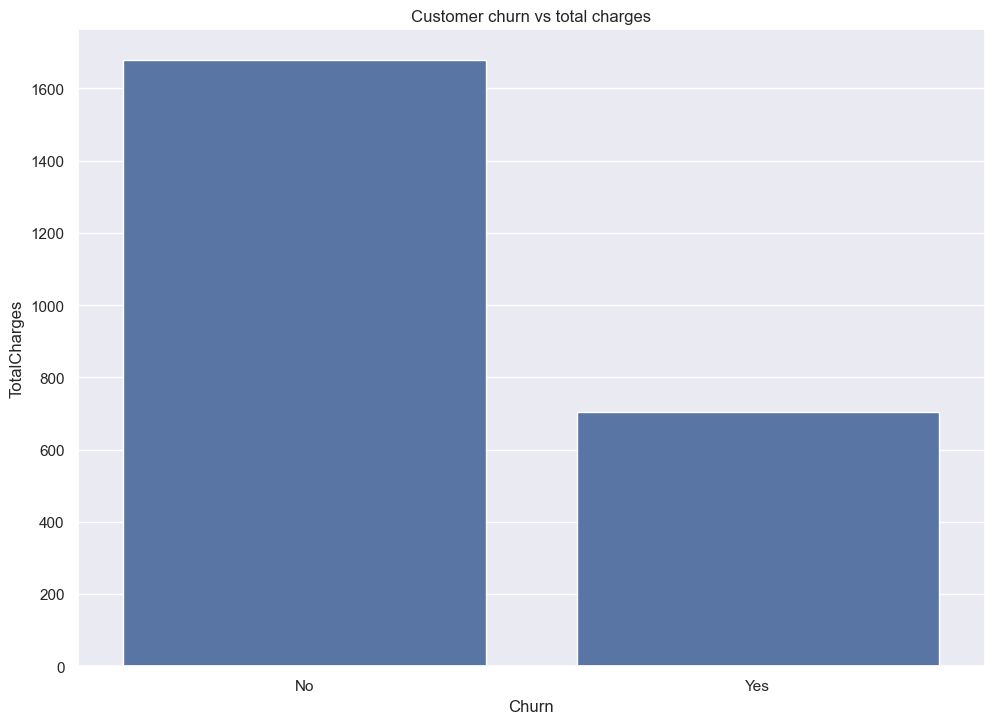

In [15]:
data = df.groupby("Churn")["TotalCharges"].median().reset_index()
sns.barplot(data=data, x="Churn", y="TotalCharges")
plt.title("Customer churn vs total charges")
plt.show()

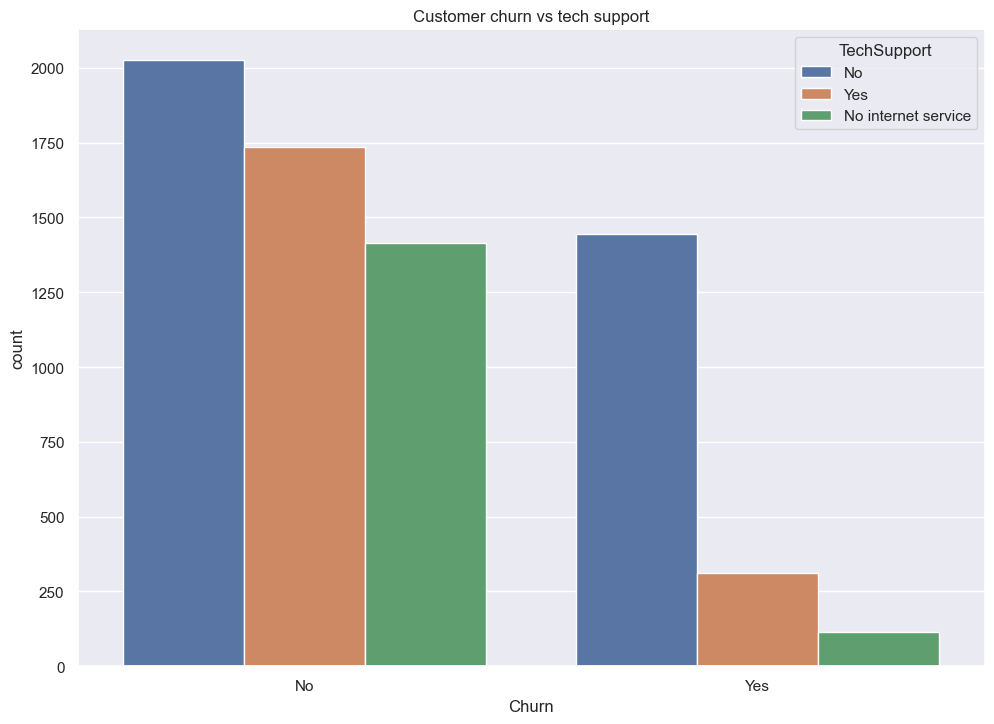

In [16]:
data = df.groupby("Churn")["TechSupport"].value_counts().reset_index()
sns.barplot(data=data, x="Churn", y="count", hue="TechSupport")
plt.title("Customer churn vs tech support")
plt.show()

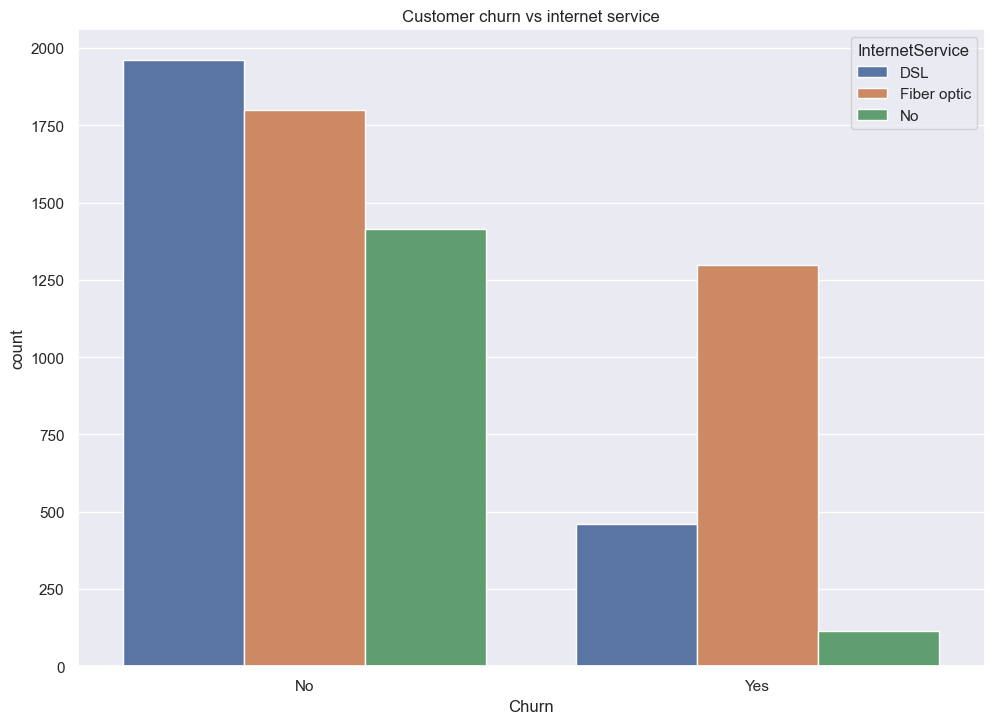

In [17]:
data = df.groupby("Churn")["InternetService"].value_counts().reset_index()
sns.barplot(data=data, x="Churn", y="count", hue="InternetService")
plt.title("Customer churn vs internet service")
plt.show()

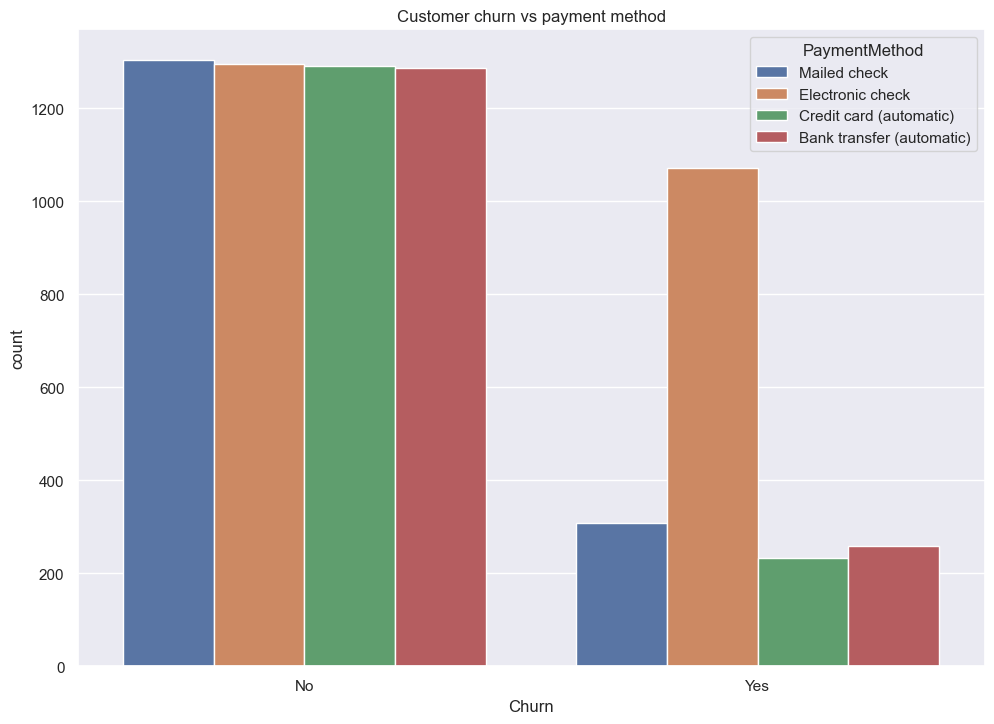

In [18]:
data = df.groupby("Churn")["PaymentMethod"].value_counts().reset_index()
sns.barplot(data=data, x="Churn", y="count", hue="PaymentMethod")
plt.title("Customer churn vs payment method")
plt.show()

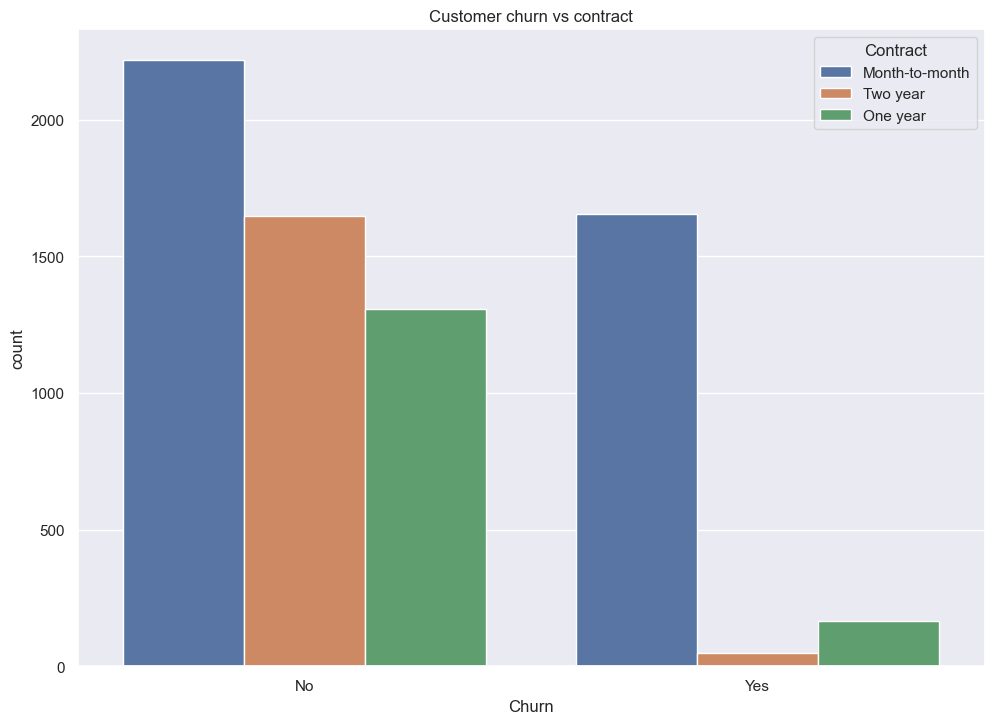

In [19]:
data = df.groupby("Churn")["Contract"].value_counts().reset_index()
sns.barplot(data=data, x="Churn", y="count", hue="Contract")
plt.title("Customer churn vs contract")
plt.show()

My observations:
1. if customer don't have depends he more likely churn
2. if customer small amount of time with company he more likely churn
3. if customer has big mouthly payment he more likely churn
4. if customer don't have tech support he more likely churn
5. if customer has fiber optical internet service he more likely churn (need to check fiber optical infrastucture)
6. if customer has electronic check he more likely churn (need to check electronic check service)
7. if customer has Mounth-to-Mounth contract he more likely churn 

To Be Continued